In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [32]:
emails = [line.strip() for line in open("sample.txt")]
labels = [1, 0, 1, 0, 1, 0]

In [33]:
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(emails)

print("=== Bag of Words (BoW) ===")
words_bow = vectorizer_bow.get_feature_names_out()
print("Feature Names (Words):", words_bow)
print("BoW Vectors (Word Counts):")
print(X_bow.toarray())


=== Bag of Words (BoW) ===
Feature Names (Words): ['50' 'account' 'act' 'agenda' 'and' 'anything' 'appointment'
 'approaching' 'approved' 'are' 'at' 'attached' 'be' 'been' 'bitcoin'
 'bob' 'buy' 'by' 'can' 'cheap' 'claim' 'click' 'client' 'com'
 'compromised' 'confirm' 'congratulations' 'daily' 'deadline' 'deals'
 'did' 'document' 'does' 'don' 'earn' 'fast' 'feedback' 'finish' 'for'
 'free' 'friday' 'from' 'get' 'grab' 'great' 'ham' 'has' 'have' 'help'
 'here' 'hey' 'hi' 'home' 'http' 'if' 'immediately' 'iphone' 'is' 'job'
 'john' 'know' 'learn' 'let' 'limited' 'll' 'loan' 'lunch' 'make' 'me'
 'medication' 'meeting' 'miss' 'monday' 'money' 'more' 'new' 'next' 'no'
 'now' 'of' 'off' 'offer' 'on' 'only' 'order' 'our' 'out' 'please' 'pm'
 'pre' 'prescription' 'presentation' 'prize' 'project' 'reminder'
 'remotely' 'report' 'reschedule' 'review' 'sarah' 'scheme' 'selected'
 'send' 'sign' 'spam' 'spamlink197' 'spamlink207' 'spamlink214'
 'spamlink290' 'spamlink292' 'spamlink332' 'spamlink33

In [34]:
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(emails)

print("\n=== TF-IDF ===")
words_tfidf = vectorizer_tfidf.get_feature_names_out()
print("Feature Names (Words):", words_tfidf)
print("TF-IDF Vectors (Word Importance):")
print(X_tfidf.toarray())



=== TF-IDF ===
Feature Names (Words): ['50' 'account' 'act' 'agenda' 'and' 'anything' 'appointment'
 'approaching' 'approved' 'are' 'at' 'attached' 'be' 'been' 'bitcoin'
 'bob' 'buy' 'by' 'can' 'cheap' 'claim' 'click' 'client' 'com'
 'compromised' 'confirm' 'congratulations' 'daily' 'deadline' 'deals'
 'did' 'document' 'does' 'don' 'earn' 'fast' 'feedback' 'finish' 'for'
 'free' 'friday' 'from' 'get' 'grab' 'great' 'ham' 'has' 'have' 'help'
 'here' 'hey' 'hi' 'home' 'http' 'if' 'immediately' 'iphone' 'is' 'job'
 'john' 'know' 'learn' 'let' 'limited' 'll' 'loan' 'lunch' 'make' 'me'
 'medication' 'meeting' 'miss' 'monday' 'money' 'more' 'new' 'next' 'no'
 'now' 'of' 'off' 'offer' 'on' 'only' 'order' 'our' 'out' 'please' 'pm'
 'pre' 'prescription' 'presentation' 'prize' 'project' 'reminder'
 'remotely' 'report' 'reschedule' 'review' 'sarah' 'scheme' 'selected'
 'send' 'sign' 'spam' 'spamlink197' 'spamlink207' 'spamlink214'
 'spamlink290' 'spamlink292' 'spamlink332' 'spamlink339' 'spamlin

In [35]:
word_freq = np.array(X_bow.sum(axis=0)).flatten()
top_bow_words = sorted(zip(word_freq, words_bow), reverse=True)[:20]
print("\nTop 20 Words by Frequency (BoW):", top_bow_words)



Top 20 Words by Frequency (BoW): [(50, 'spam'), (50, 'ham'), (39, 'for'), (38, 'http'), (38, 'com'), (35, 'at'), (30, 'you'), (29, 'your'), (24, 'to'), (24, 'now'), (23, 'the'), (19, 'claim'), (19, 'been'), (17, 'with'), (15, 'loan'), (15, 'bob'), (14, 'team'), (14, 'on'), (14, 'medication'), (14, 'has')]


In [36]:
word_tfidf = np.array(X_tfidf.sum(axis=0)).flatten()
top_tfidf_words = sorted(zip(word_tfidf, words_tfidf), reverse=True)[:20]
print("Top 20 Words by TF-IDF:", top_tfidf_words)

Top 20 Words by TF-IDF: [(8.64069683140137, 'ham'), (8.029607737341218, 'for'), (7.398436521600416, 'spam'), (6.621256541827758, 'at'), (6.4646482668296, 'your'), (6.314720029416324, 'you'), (6.0940814934387815, 'http'), (6.0940814934387815, 'com'), (5.811930676816671, 'the'), (5.2484882969280084, 'to'), (5.1946526492935075, 'now'), (4.800097708767761, 'with'), (4.595121834170193, 'claim'), (4.402026649128602, 'bob'), (4.3915304709428415, 'been'), (4.24777705491313, 'team'), (3.953115144143045, 'our'), (3.953115144143045, 'meeting'), (3.798121606419438, 'loan'), (3.7392406416950896, 'has')]


In [37]:
# Load sample.txt
texts = []
labels = []

with open("sample.txt", "r") as f:
    for line in f:
        label, text = line.strip().split("\t", 1)
        texts.append(text)
        labels.append(1 if label == "spam" else 0)

print(f"Loaded {len(texts)} emails with labels.")


Loaded 100 emails with labels.


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        ngram_range=(1,2),
        min_df=1      # <-- lowered from 2 to 1
    )),
    ("clf", MultinomialNB(alpha=1.0))
])


In [40]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', MultinomialNB())])

Accuracy: 1.0000
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00        10
        spam       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



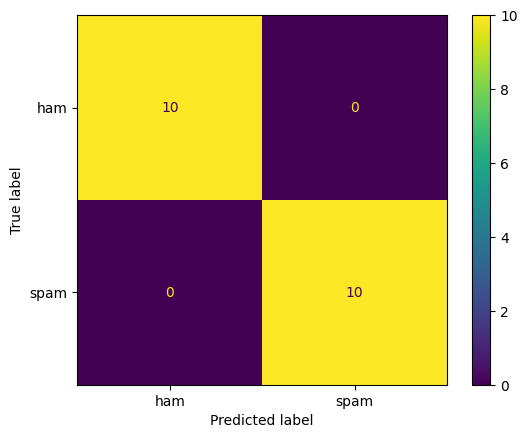

In [41]:
from sklearn.metrics import accuracy_score

# Predict
y_pred = pipeline.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: full report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["ham", "spam"])
